# TP SPLINE

## Q1

In [1]:
import numpy as np

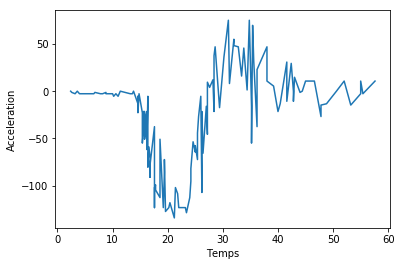

In [236]:
data = np.loadtxt('Motorcycledata.txt')[:,1:]
import matplotlib.pyplot as plt
plt.plot(data[:,0], data[:,1])
plt.ylabel("Acceleration")
plt.xlabel("Temps")
plt.show()

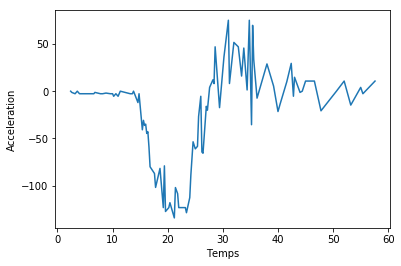

In [237]:
data_temp= []
D = []

t_temp = 0
moy = 0
n = 1

for t,v in data:
    if (t == t_temp):
        moy += v
        n += 1
    else:
        D.append(n)
        data_temp.append(list((t_temp, moy/n)))
        moy = v
        n = 1
        t_temp = t
        
D.append(n)
D.pop(0)
data_temp.append(list((t_temp, moy/n)))
data_temp.pop(0)

data = np.array(data_temp)
plt.ylabel("Acceleration")
plt.xlabel("Temps")
plt.plot(data[:,0], data[:,1])
plt.show()

In [238]:
D = np.diag(D)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

## Q2

In [241]:
from sklearn.linear_model import LinearRegression

m = 50
t = data[:,0] #/60

temp = t.reshape((t.shape[0],1))

X = np.hstack([temp**k for k in range(1, m+1)])
Y = data[:,1]

reg = LinearRegression().fit(X, Y)
Y_pred = reg.predict(X)

#### NON FONCTIONNEL AVEC SKLEARN !!

Y_pred = np.poly1d(np.polyfit(t, Y, m))(t)

/usr/lib/python3/dist-packages/ipykernel/__main__.py:16: RankWarning: Polyfit may be poorly conditioned


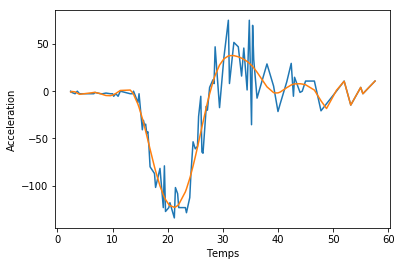

In [242]:
plt.plot(t, Y)
plt.plot(t, Y_pred)
plt.xlabel("Temps")
plt.ylabel("Acceleration")
plt.show()

In [243]:
n = t.shape[0]
n

94

## Q3

In [244]:
h = t[1:]-t[:n-1]

Q = np.zeros((n,n-2))

for j in range(n-2):
    Q[j,j] = 1/h[j]
    Q[j+1,j] = -1/h[j] - 1/h[j+1]
    Q[j+2,j] = 1/h[j+1]

R = np.zeros((n-2,n-2))
for j in range(n-2):
    R[j,j] = 1/3 * (h[j]+h[j+1])
    if j<n-3:
        R[j+1,j] = 1/6*h[j+1]
        R[j,j+1] = 1/6*h[j+1]

K = np.dot(np.dot(Q, np.linalg.inv(R)), Q.T)

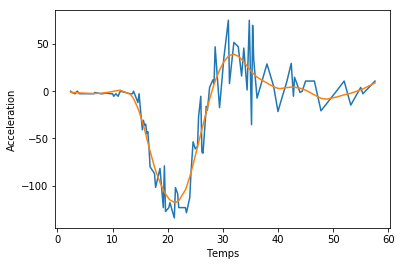

In [245]:
alpha = 10
Y_pred = np.dot(np.dot(np.linalg.inv(D+alpha*K), D), Y)

plt.plot(t, Y)
plt.plot(t, Y_pred)
plt.xlabel("Temps")
plt.ylabel("Acceleration")
plt.show()

In [194]:
Q[:7,:5]

array([[ 5.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-6.66666667,  1.66666667,  0.        ,  0.        ,  0.        ],
       [ 1.66666667, -4.16666667,  2.5       ,  0.        ,  0.        ],
       [ 0.        ,  2.5       , -5.        ,  2.5       ,  0.        ],
       [ 0.        ,  0.        ,  2.5       , -2.95454545,  0.45454545],
       [ 0.        ,  0.        ,  0.        ,  0.45454545, -2.95454545],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.5       ]])

In [195]:
R[:5,:5]

array([[0.26666667, 0.1       , 0.        , 0.        , 0.        ],
       [0.1       , 0.33333333, 0.06666667, 0.        , 0.        ],
       [0.        , 0.06666667, 0.26666667, 0.06666667, 0.        ],
       [0.        , 0.        , 0.06666667, 0.86666667, 0.36666667],
       [0.        , 0.        , 0.        , 0.36666667, 0.86666667]])

In [261]:
D_temp = D
D = np.eye(n)
def CV(alpha):
    A = np.dot(np.linalg.inv(D+alpha*K), D)
    return np.sum(np.dot(D,((Y - np.dot(A,Y))/np.diag(np.eye(n)-A))**2))

def GCV(alpha):
    A = np.dot(np.linalg.inv(D+alpha*K), D)
    return np.sum(np.dot(D, (Y - np.dot(A,Y))**2))/((1-1/n*np.sum(np.diag(A)))**2)

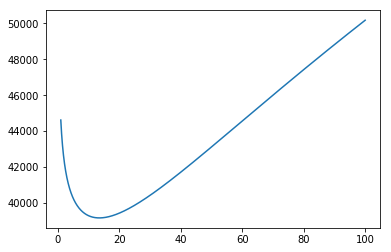

13.53

In [262]:
alpha_min = 1
m = CV(1)
cvs = []
alphas = np.array(range(100,10001))/100

for alpha in alphas:
    v = GCV(alpha)
    cvs.append(v)
    if v<m:
        m = v
        alpha_min = alpha

plt.plot(alphas, cvs)
plt.show()
alpha_min

In [255]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])